In [1]:
import matplotlib
%matplotlib inline

In [3]:
import numpy as np
from numpy.random import rand, randn, RandomState
from matplotlib import pyplot as plt
import matplotlib

In [131]:
class Data:
    def __init__(self, X, h=0.5):
        """
        X: [[x0[0], x1[0], ...], [x0[1], x1[1], ...]]
        y: [y0, y1, ...]
        """
        self._X = X
        self._h = h

    @property
    def X(self):
        return self._X

    @property
    def kernel_matrix(self):
        return np.exp(- self._square_dist() / (2 * self._h**2))

    def _square_dist(self):
        sqr = np.square(self._X[0]) + np.square(self._X[1])
        sqr_m = np.tile(sqr, (sqr.shape[0], 1))
        return sqr_m + sqr_m.T - 2 * self._X.T @ self._X


In [122]:
class LPP:
    def __init__(self, data):
        self._data = data

    def _weight_matrix(self):
        """
        Distance based matrix
        """
        return self._data.kernel_matrix

    def _D_matrix(self):
        return np.diag(np.sum(self._weight_matrix(), axis=0))

    def _laplacian_matrix(self):
        return self._D_matrix() - self._weight_matrix()

    def calculate_T(self, dim: int):
        """
        dim: Number of eighen vectors.
        Return: T = [e_vec_0, e_vec_1, ..., e_vec_dim]
        """
        A = self._data.X @ self._laplacian_matrix() @ self._data.X.T
        B = self._data.X @ self._D_matrix() @ self._data.X.T
        B_half_inv = np.linalg.inv(self._matrix_root(B))
        C = B_half_inv @ A @ B_half_inv
        e_val, e_vec = np.linalg.eigh(C)
        print(e_val, np.argsort(e_val))
        print(e_vec)
        T = np.array([e_vec[:, i] for i in np.argsort(e_val)])
        print(T[:dim])
        return T[:dim]

    def _matrix_root(self, A):
        """
        Calculate X s.t. XX = A
        A should be a positive definite matrix.
        """
        e_val, e_vec = np.linalg.eigh(A)
        sqrt_e_val = np.sqrt(e_val)
        return np.sum([v * e_vec[:, i][:, np.newaxis] @ e_vec[:, i][np.newaxis, :]
                       for i, v in enumerate(sqrt_e_val)], axis=0)


In [123]:
def prepare_data(n):
    X0 = np.array([2 * randn(n), 0.5*randn(n)])
    X1 = np.array([2 * randn(n), 3 * np.round(rand(n)) - 1.5 + randn(n) / 3])
    return X0, X1


def main():
    X0, X1 = prepare_data(200)
    d0, d1 = Data(X0), Data(X1)
    lpp_0 = LPP(d0)
    lpp_1 = LPP(d1)
    zeta0 = lpp_0.calculate_T(1)[0]
    zeta1 = lpp_1.calculate_T(1)[0]

    line_points = np.linspace(-6, 6, 10)

    fig = plt.figure(figsize=(25, 10))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.plot(X0[0, :], X0[1, :], 'bo')
    ax1.plot(line_points, line_points * zeta0[1] / zeta0[0], 'g')
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-4, 4)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.plot(X1[0, :], X1[1, :], 'bo')
    ax2.plot(line_points, line_points * zeta1[1] / zeta1[0], 'g')
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(-4, 4)

    fig.show()


[  2.14508712e-08   1.89942726e-06] [0 1]
[[-0.99924669  0.038808  ]
 [ 0.038808    0.99924669]]
[[-0.99924669  0.038808  ]]
[  1.79958309e-08   3.31430308e-08] [0 1]
[[ 0.14848737 -0.9889143 ]
 [-0.9889143  -0.14848737]]
[[ 0.14848737 -0.9889143 ]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


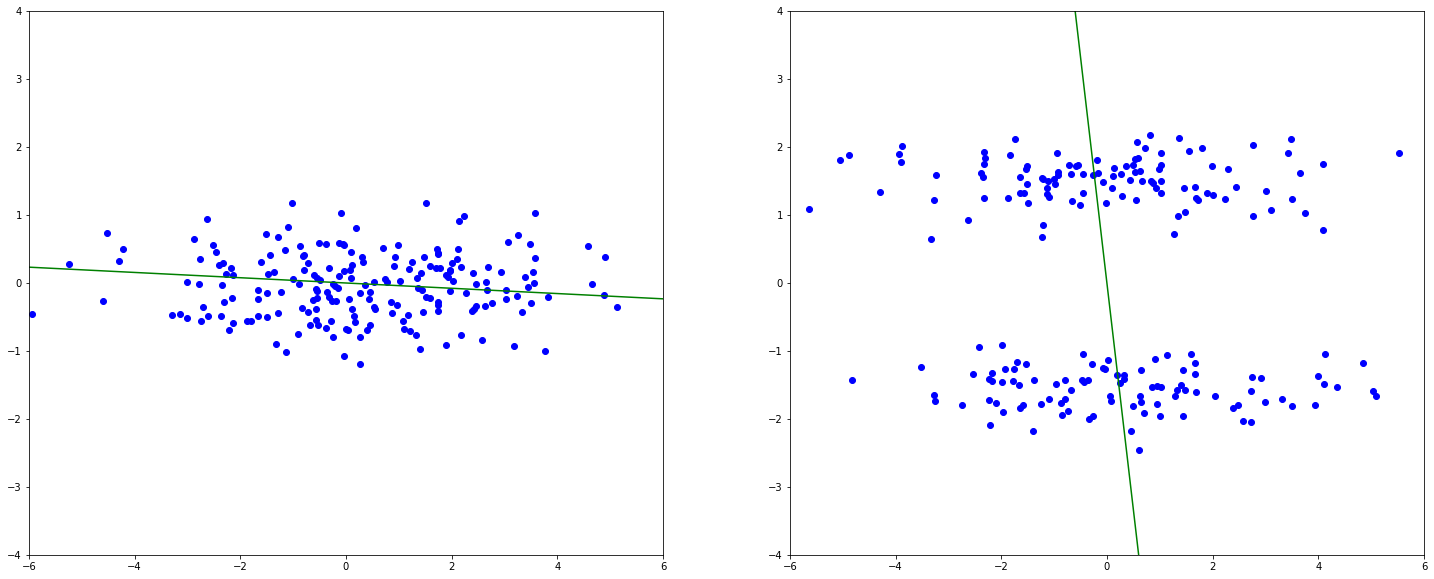

In [125]:
main()

[  2.82440284e-07   1.59266989e-06] [0 1]
[[-0.99999752  0.00222651]
 [ 0.00222651  0.99999752]]
[[-0.99999752  0.00222651]]
[  1.00492343e-08   1.48517842e-07] [0 1]
[[-0.98873141  0.14970033]
 [ 0.14970033  0.98873141]]
[[-0.98873141  0.14970033]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


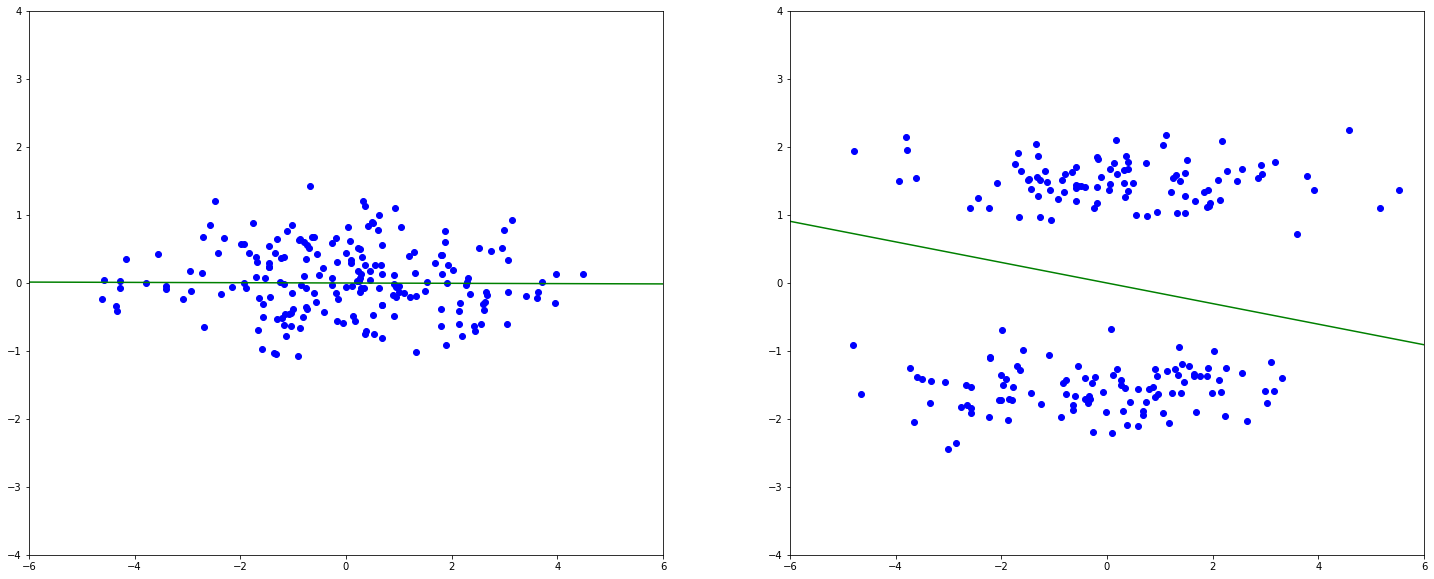

In [126]:
main()

[  1.27879428e-07   6.10699282e-07] [0 1]
[[-0.99247367  0.12245825]
 [ 0.12245825  0.99247367]]
[[-0.99247367  0.12245825]]
[  6.50950121e-08   1.93206532e-07] [0 1]
[[-0.99987229  0.01598155]
 [ 0.01598155  0.99987229]]
[[-0.99987229  0.01598155]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


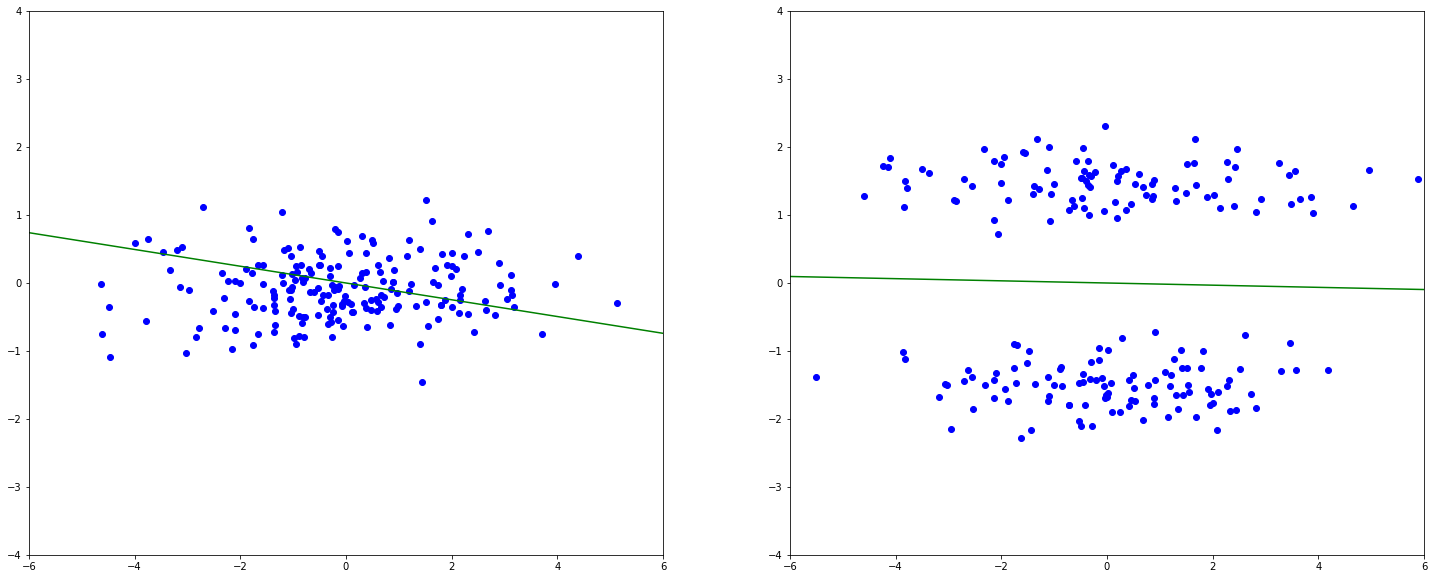

In [127]:
main()

[  1.66511738e-07   1.06528447e-06] [0 1]
[[-0.98477911 -0.17381052]
 [-0.17381052  0.98477911]]
[[-0.98477911 -0.17381052]]
[  3.88837553e-08   1.28625087e-07] [0 1]
[[-0.98264784 -0.18548105]
 [-0.18548105  0.98264784]]
[[-0.98264784 -0.18548105]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


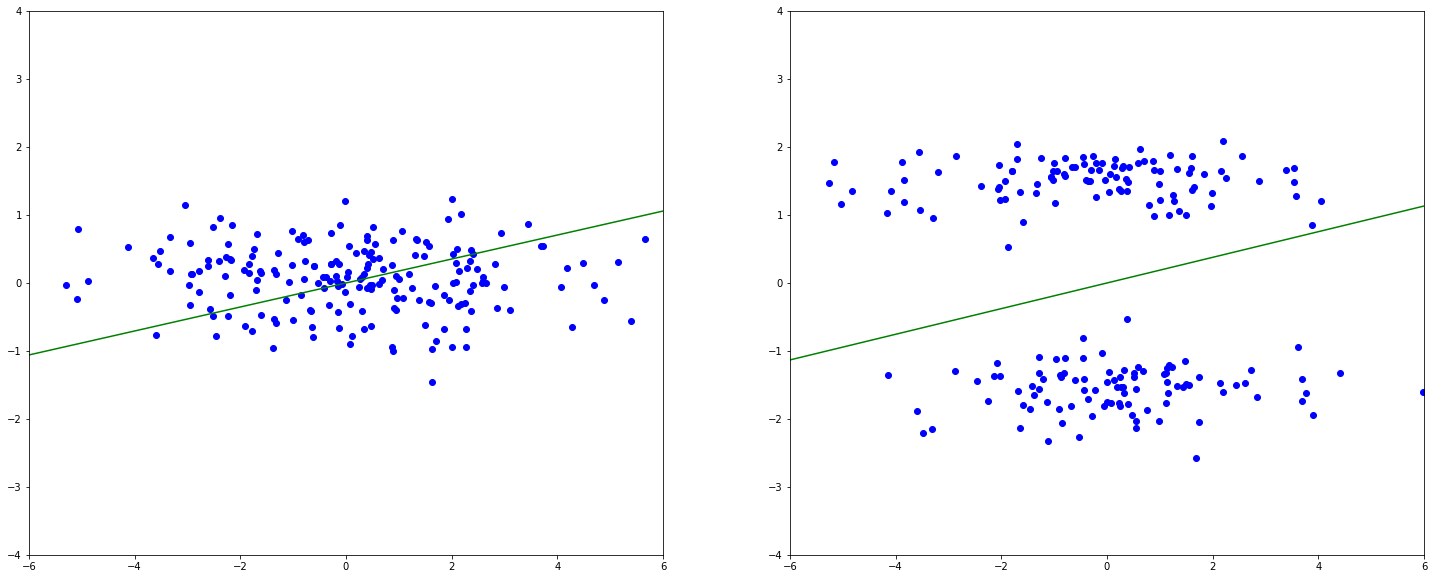

In [128]:
main()

[  1.08444378e-07   3.25652503e-06] [0 1]
[[-0.99878949  0.04918896]
 [ 0.04918896  0.99878949]]
[[-0.99878949  0.04918896]]
[  2.14128641e-08   1.35747518e-07] [0 1]
[[-0.99803126  0.06271849]
 [ 0.06271849  0.99803126]]
[[-0.99803126  0.06271849]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


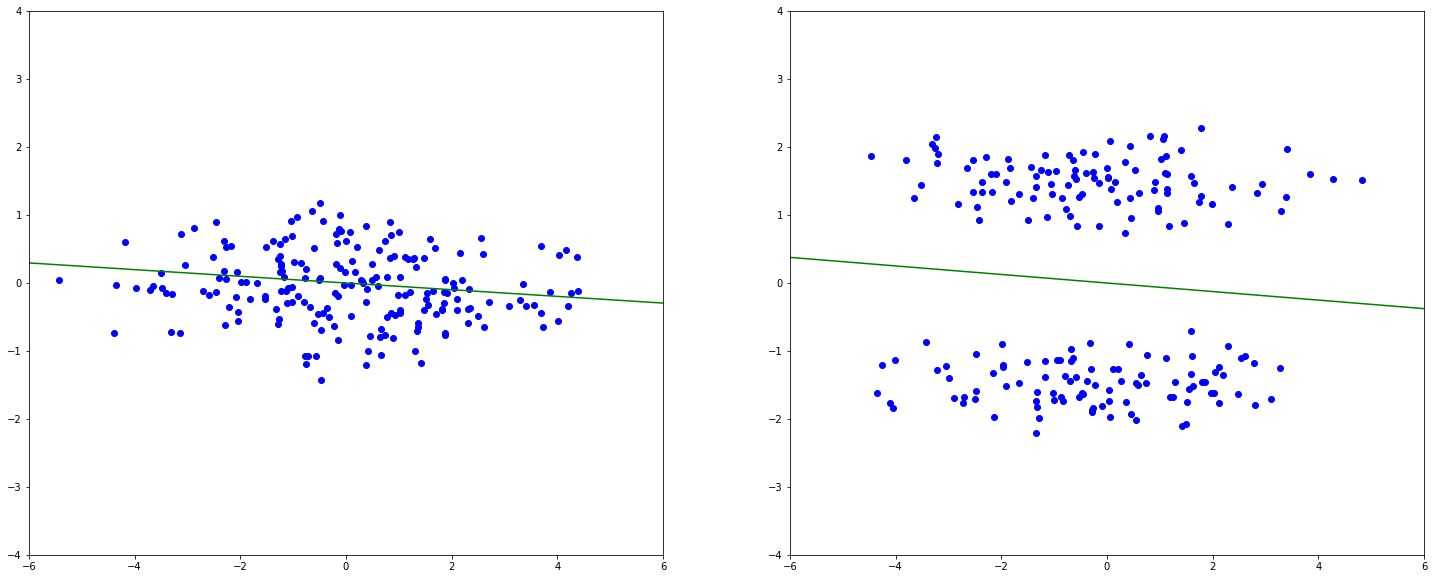

In [129]:
main()

[  9.72780547e-08   1.34616891e-06] [0 1]
[[-0.99979923  0.0200373 ]
 [ 0.0200373   0.99979923]]
[[-0.99979923  0.0200373 ]]
[  9.84614289e-09   6.33943785e-08] [0 1]
[[-0.81329217 -0.58185553]
 [-0.58185553  0.81329217]]
[[-0.81329217 -0.58185553]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


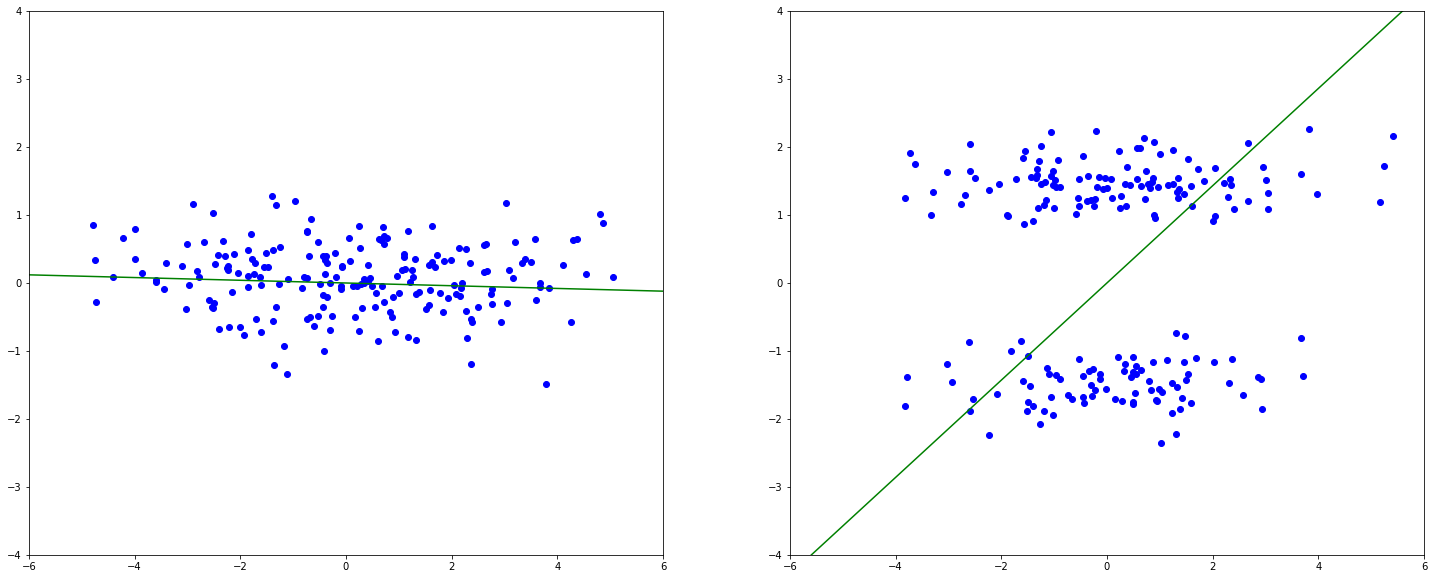

In [130]:
main()

[ 0.06160758  0.47525485] [0 1]
[[-0.99991738  0.01285439]
 [ 0.01285439  0.99991738]]
[[-0.99991738  0.01285439]]
[ 0.02133113  0.05262688] [0 1]
[[-0.07535769 -0.99715657]
 [-0.99715657  0.07535769]]
[[-0.07535769 -0.99715657]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


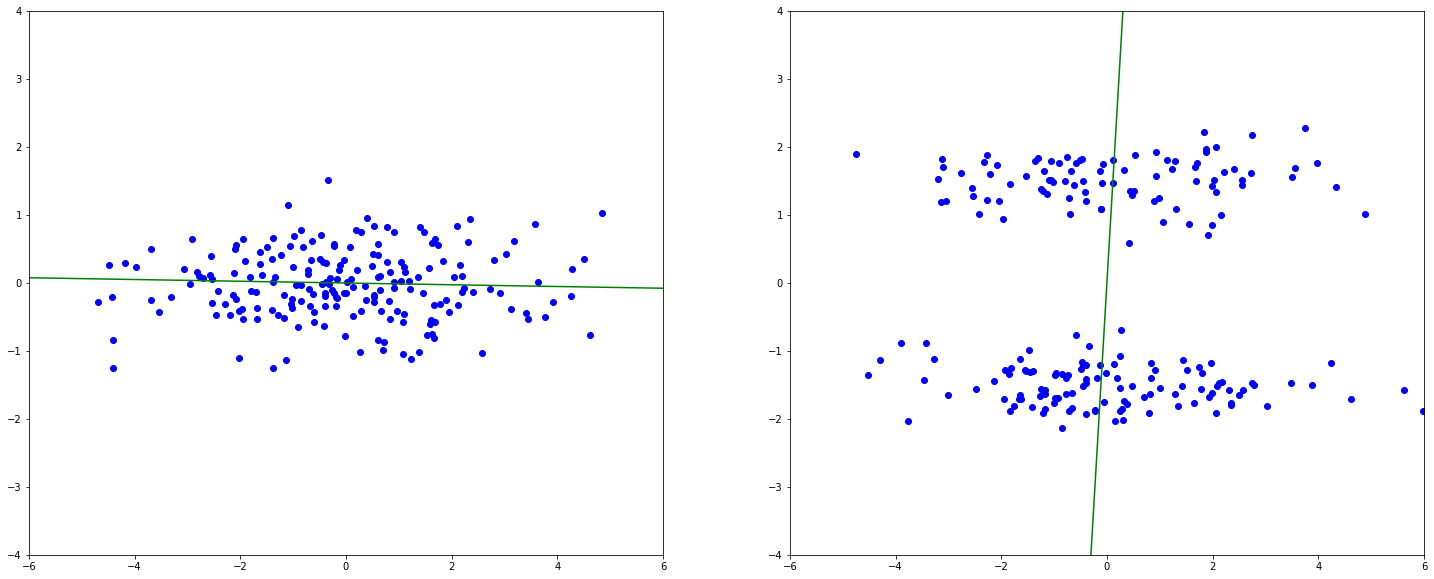

In [132]:
main()

[ 0.05696957  0.45072137] [0 1]
[[-0.99961209  0.02785085]
 [ 0.02785085  0.99961209]]
[[-0.99961209  0.02785085]]
[ 0.02536418  0.05162415] [0 1]
[[-0.0770916  -0.99702401]
 [-0.99702401  0.0770916 ]]
[[-0.0770916  -0.99702401]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


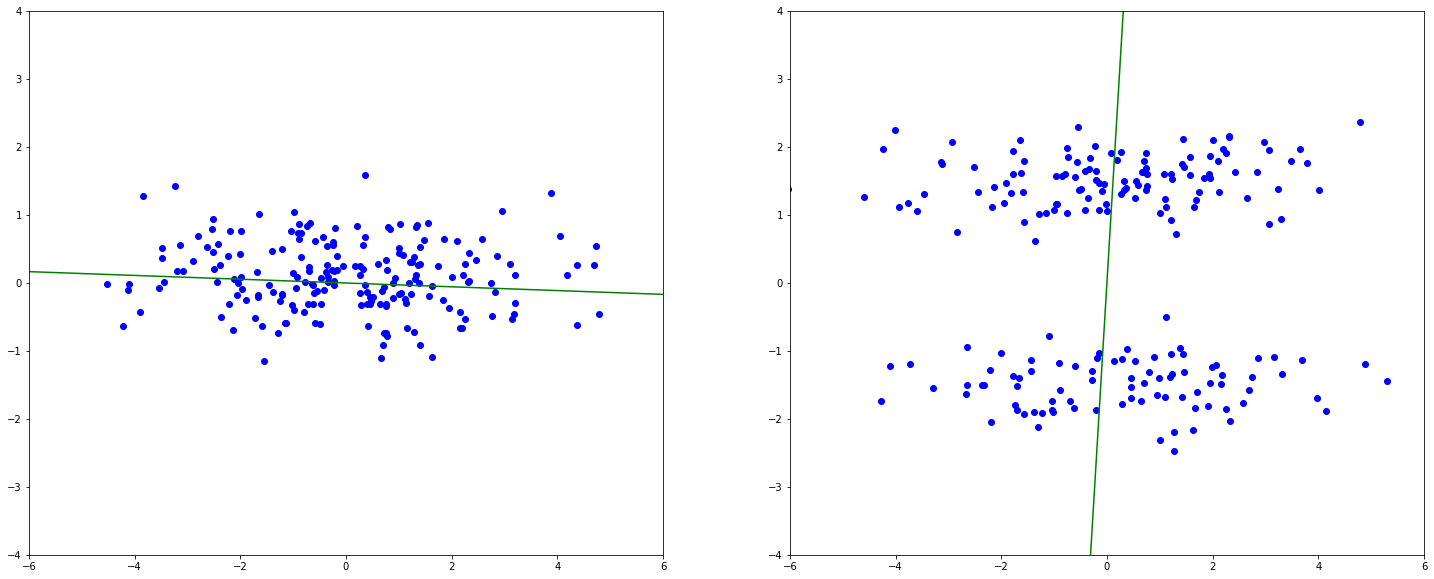

In [133]:
main()

[ 0.05782612  0.43716313] [0 1]
[[-0.99910018 -0.04241261]
 [-0.04241261  0.99910018]]
[[-0.99910018 -0.04241261]]
[ 0.02266269  0.05194792] [0 1]
[[ 0.05431408 -0.9985239 ]
 [-0.9985239  -0.05431408]]
[[ 0.05431408 -0.9985239 ]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


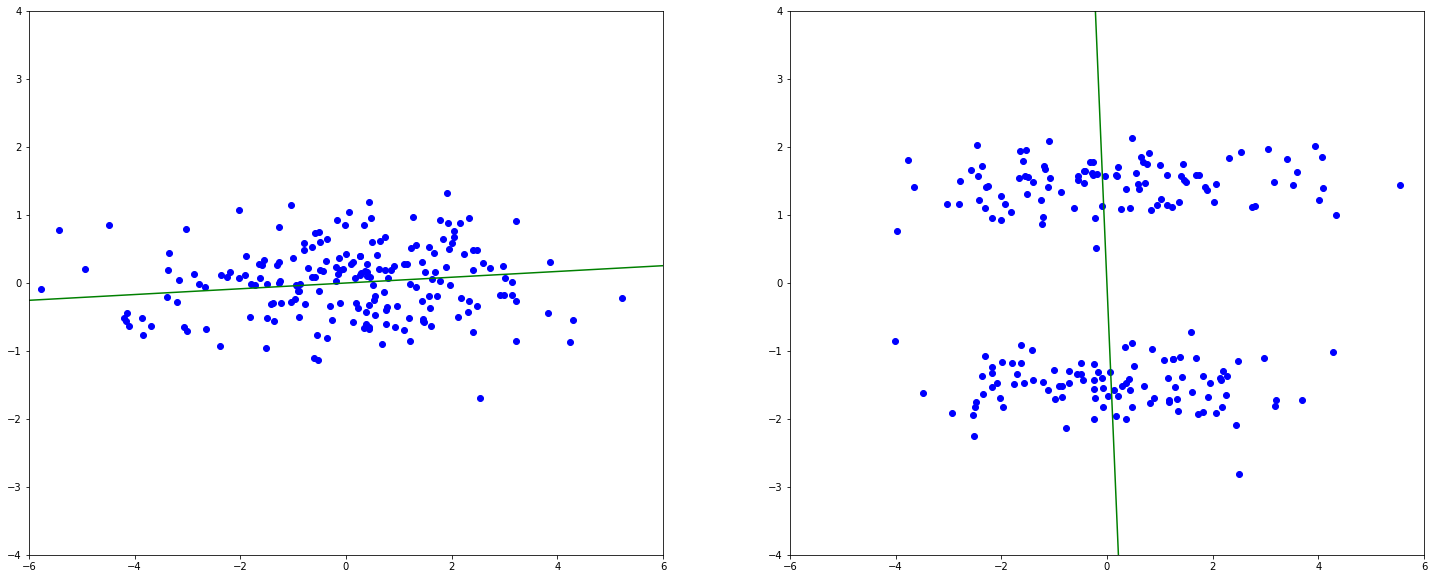

In [134]:
main()

[ 0.04815261  0.42564257] [0 1]
[[-0.99999619 -0.00275983]
 [-0.00275983  0.99999619]]
[[-0.99999619 -0.00275983]]
[ 0.02229731  0.05990806] [0 1]
[[ 0.09092854 -0.99585742]
 [-0.99585742 -0.09092854]]
[[ 0.09092854 -0.99585742]]


/Users/luning/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


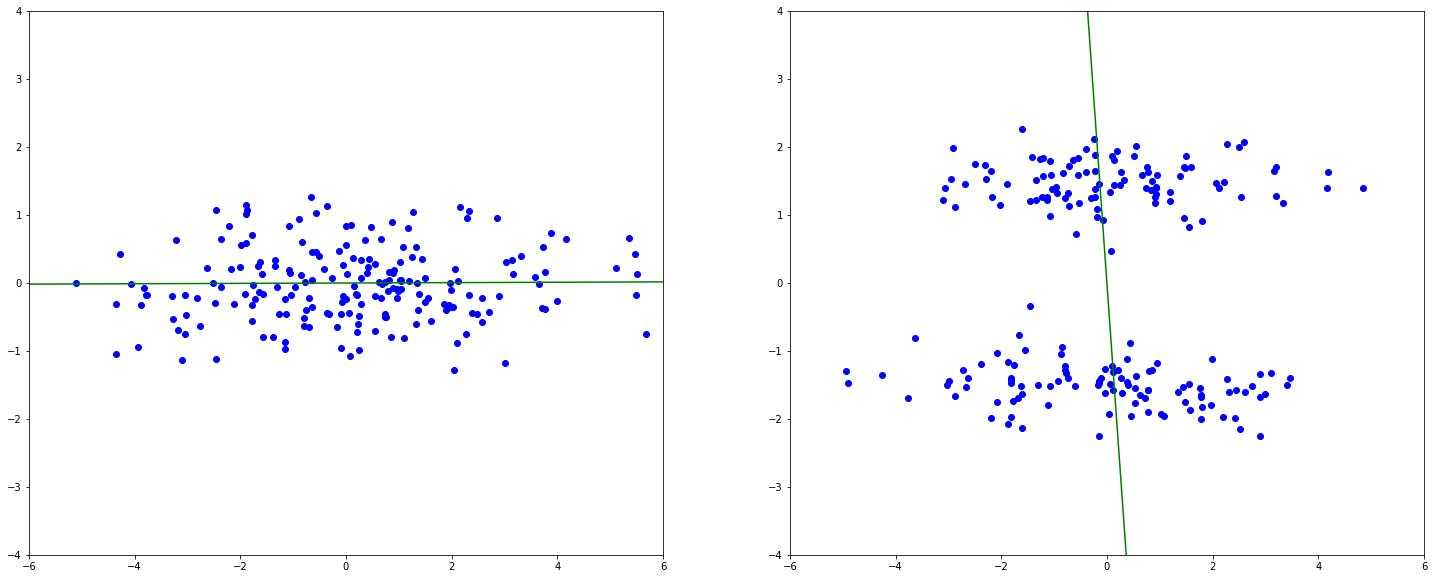

In [135]:
main()